In [1]:
import glob
import os
import pandas as pd
from io import StringIO
from matplotlib import pyplot as plt
from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('png', 'pdf')
import numpy as np
import matplotlib as mpl
import sys
import os
mpl.rcParams.update(mpl.rcParamsDefault)

plt.rc('font', family='sans-serif')#, serif='Times')
plt.rc('xtick', labelsize=11)
plt.rc('ytick', labelsize=11)
plt.rc('axes', labelsize=12)
plt.rc('legend', fontsize=11)
#plt.rcParams['mathtext.fontset'] = 'stix'
#plt.rcParams['font.family'] = 'STIXGeneral'
params = {
'text.usetex': True,
#'font.size': 15,
#'text.latex.unicode': True
}
plt.rcParams.update(params)

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
def get_total_size(path, extension):
    total = 0
    for entry in os.scandir(path):
        if entry.path.endswith(extension):
            total += entry.stat(follow_symlinks=False).st_size
    return total

## RNA-Seq (k=23)

In [3]:
DIR = '/cluster/home/mikhaika/metagenome/data/row_diff/subsets/rnaseq/nobackup/mtg/'

n_samples = []
columns = []
rd_optimized_100 = []
rd_optimized_100_multi_brwt = []
rd_optimized_100_row_sparse = []
multi_brwt = []
rb_brwt = []
mst = []

for i in range(1, 11):
    num_cols = !cat {DIR}../../{i}k.txt | wc -l
    n_samples.append(int(num_cols[0]))

    columns.append(get_total_size(f'{DIR}cols_{i}k/', '.column.annodbg'))

    #rd_optimized_100.append(get_total_size(f'{DIR}rd_100_{i}k/', '.row_diff.annodbg'))
    rd_optimized_100.append(np.nan)

    try:
        rd_optimized_100_row_sparse.append(os.path.getsize(DIR + 'row_sparse/rd_100_{}k.row_diff_sparse.annodbg'.format(i)))
    except:
        rd_optimized_100_row_sparse.append(np.nan)

    try:
        rd_optimized_100_multi_brwt.append(os.path.getsize(DIR + 'multi_brwt/rd_100_{}k_relaxed.row_diff_brwt.annodbg'.format(i)))
    except:
        rd_optimized_100_multi_brwt.append(np.nan)

    try:
        multi_brwt.append(os.path.getsize(DIR + 'multi_brwt/brwt_relaxed_{}k.brwt.annodbg'.format(i)))
    except:
        multi_brwt.append(np.nan)

    try:
        rb_brwt.append(os.path.getsize(DIR + 'multi_brwt/rb_brwt_{}k.rb_brwt.annodbg'.format(i)))
    except:
        rb_brwt.append(np.nan)

    try:
        mantis_dir = '/cluster/home/mikhaika/metagenome/data/row_diff/mantis/mantis_cqfs/ser_{}k_scratch.fast/'.format(i)
        mst.append(os.path.getsize(mantis_dir + 'parents.bv'.format(i))
                    + os.path.getsize(mantis_dir + 'boundaries.bv'.format(i))
                    + os.path.getsize(mantis_dir + 'deltas.bv'.format(i)))
    except:
        mst.append(np.nan)

In [4]:
rainbow_assignment_vector_size = [
    5099393699,
    8654440075,
    12091059547,
    15233585963,
    18621953051,
    21489605395,
    24231542451,
    27058051403,
    30060233659,
    32779537227
]

mst_paper_size = [
    1.03 * 10**9,
    2.35 * 10**9,
    np.nan,
    np.nan,
    7.21 * 10**9,
    np.nan,
    np.nan,
    np.nan,
    np.nan,
    16.28 * 10**9
]

In [5]:
results = pd.DataFrame(columns=['n_samples', 'column_compressed', 'rb_brwt', 'multi_brwt',
                                #'rd_optimized_10', 'rd_optimized_20', 'rd_optimized_40',
                                'rd_optimized_100',
                                'rd_optimized_100_row_sparse',
                                'rd_optimized_100_multi_brwt',
                                'assignment_vector',
                                'mst',
                                'mst_paper'],
                       data=zip(n_samples, columns, rb_brwt, multi_brwt,
                                #rd_optimized_10, rd_optimized_20, rd_optimized_40,
                                rd_optimized_100,
                                rd_optimized_100_row_sparse,
                                rd_optimized_100_multi_brwt,
                                rainbow_assignment_vector_size,
                                mst,
                                mst_paper_size))
results

,n_samples,column_compressed,rb_brwt,multi_brwt,rd_optimized_100,rd_optimized_100_row_sparse,rd_optimized_100_multi_brwt,assignment_vector,mst,mst_paper
0,1000,17041114456,8488560511,10416602955,NaN,5530827188,2531812320,5099393699,1062809114,1.030000e+09
1,2000,36493236303,16167252150,19838891591,NaN,11017855037,5440254833,8654440075,2322082202,2.350000e+09
2,3000,55143415112,23920167278,29585252004,NaN,17311213522,8655890681,12091059547,3817334178,NaN
3,4000,79766483394,31537519288,38510273140,NaN,23843155385,12045907430,15233585963,5183193210,NaN
4,5000,99673000727,39399381367,48573893463,NaN,31019333253,15764093014,18621953051,6975993530,7.210000e+09
5,6000,119353191140,46758713412,57652510865,NaN,37915590645,19244895186,21489605395,8473578282,NaN
6,7000,138511373857,53997524167,65424631640,NaN,44797875565,22793838248,24231542451,10000729970,NaN
7,8000,159167902757,61686156920,75038959203,NaN,52224641757,26761020255,27058051403,11558990202,NaN
8,9000,179082669880,69520201705,83929963109,NaN,59868927733,30645683567,30060233659,13902107962,NaN
9,9998,214142961204,77027638437,92776465294,NaN,67138537889,34423279580,32779537227,15569878818,1.628000e+10


In [6]:
(results.assignment_vector + results.mst).iloc[-1]

48349416045

In [7]:
results.rd_optimized_100_multi_brwt.iloc[-1]

34423279580

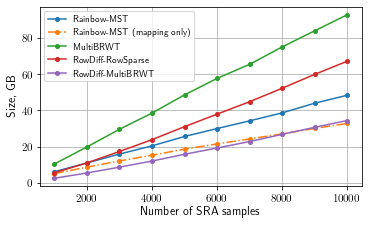

In [8]:
width = 3.487 * 1.5
height = width / 1.618

fig, axes = plt.subplots(1, 1, figsize=(width, height))
#ax.set_title('RefSeq assembly graph')

# results.sort_values('num_kmers', inplace=True)

# colors = ['c', 'b', 'g', 'r']

ax = axes

# lines = ax.plot(results.n_samples, results.rb_brwt / 10**9,
#                 marker='o', ms=4, label='Rainbow-BRWT', linestyle='-.')

f = ~(results.assignment_vector + results.mst).isna()
lines = ax.plot(results.n_samples[f], (results.assignment_vector + results.mst)[f] / 10**9,
                marker='o', ms=4, label='Rainbow-MST')

# f = ~(results.assignment_vector + results.mst_paper).isna()
# lines = ax.plot(results.n_samples[f], (results.assignment_vector + results.mst_paper)[f] / 10**9,
#                 marker='o', ms=4, label='Rainbow-MST reported')

lines = ax.plot(results.n_samples, results.assignment_vector / 10**9,
                marker='o', ms=4, label='Rainbow-MST (mapping only)', linestyle='-.')

lines = ax.plot(results.n_samples, results.multi_brwt / 10**9,
                marker='o', ms=4, label='MultiBRWT')

# ax.plot(results.n_samples, results.column_compressed / 10**9,
#         marker='o', ms=4, label='ColumnCompressed', linestyle=':')

# ax.plot(results.n_samples, results.rd_optimized_100 / 10**9,
#         marker='o', ms=4, label='RowDiff(100)-ColumnCompressed', linestyle=':')

ax.plot(results.n_samples, results.rd_optimized_100_row_sparse / 10**9,
        marker='o', ms=4, label='RowDiff-RowSparse')

ax.plot(results.n_samples, results.rd_optimized_100_multi_brwt / 10**9,
        marker='o', ms=4, label='RowDiff-MultiBRWT')

# ax.plot(results.n_samples,
#         (results.graph + results.anno_column) / 10**9,
#         marker='o', ms=4, label='RowDiff (Graph + Column)', color=lines[0].get_color())

#ax.set_title('10k RNA-Seq samples, k=23, k-mer level cleaning')
ax.set_xlabel('Number of SRA samples')
ax.set_ylabel('Size, GB')
#     ax.set_xlim([-1e9, 25e9])
#ax.set_xticks(np.array(k_array))
ax.grid(True)
ax.legend(loc='best', fontsize=9)

#legend = ax.legend(loc="best", fontsize=12)
#legend.get_frame().set_facecolor('none')
# plt.ylim([-5, 110])
# axes[1].set_ylim([-1e-1, 75])
#plt.xscale('symlog')
#plt.yscale('symlog')

plt.tight_layout()
plt.savefig('rnaseq_23_size.pdf', format='pdf', bbox_inches='tight')
plt.show()

## RNA-Seq (k=31, unitig cleaning)

In [9]:
!ls -lh /cluster/work/grlab/projects/metagenome/data/row_diff/mantis/mantis_cqfs_k31/clean_1k.ser/

total 438G
-rw-rw---- 1 hmustafa INFK-Raetsch-All 851M Nov  5 04:14 0_eqclass_rrr.cls
-rw-rw---- 1 hmustafa INFK-Raetsch-All 1.1G Nov  5 04:14 1_eqclass_rrr.cls
-rw-rw---- 1 hmustafa INFK-Raetsch-All 1.2G Nov  5 04:14 2_eqclass_rrr.cls
-rw-rw---- 1 hmustafa INFK-Raetsch-All  38M Nov  5 04:14 3_eqclass_rrr.cls
-rw-rw---- 1 hmustafa INFK-Raetsch-All  25M Nov  5 14:53 boundaries.bv
-rwx------ 1 hmustafa INFK-Raetsch-All 435G Nov  5 04:14 dbg_cqf.ser
-rw-rw---- 1 hmustafa INFK-Raetsch-All 250M Nov  5 14:53 deltas.bv
-rw-rw---- 1 hmustafa INFK-Raetsch-All  385 Nov  5 03:59 meta_info.json
-rw-rw---- 1 hmustafa INFK-Raetsch-All 188M Nov  5 14:53 parents.bv
-rw-rw---- 1 hmustafa INFK-Raetsch-All  23K Nov  5 04:14 sampleid.lst


In [10]:
DIR = '/cluster/home/mikhaika/metagenome/data/row_diff/subsets/clean_rnaseq/nobackup/mtg/'

n_samples = []
columns = []
rd_optimized_100 = []
rd_optimized_100_multi_brwt = []
rd_optimized_100_row_sparse = []
rb_brwt = []
multi_brwt = []
mst = []

for i in range(1, 11):
    num_cols = !cat {DIR}../../clean_{i}k.txt | wc -l
    n_samples.append(int(num_cols[0]))

    columns.append(get_total_size(f'{DIR}cols_{i}k/', '.column.annodbg'))

    #rd_optimized_100.append(get_total_size(f'{DIR}rd_100_{i}k/', '.annodbg'))
    rd_optimized_100.append(np.nan)

    try:
        rd_optimized_100_row_sparse.append(os.path.getsize(DIR + 'row_sparse/rd_100_{}k.row_diff_sparse.annodbg'.format(i)))
    except:
        rd_optimized_100_row_sparse.append(np.nan)

    try:
        rd_optimized_100_multi_brwt.append(os.path.getsize(DIR + 'multi_brwt/rd_100_{}k_relaxed.row_diff_brwt.annodbg'.format(i)))
    except:
        rd_optimized_100_multi_brwt.append(np.nan)

    try:
        multi_brwt.append(os.path.getsize(DIR + 'multi_brwt/brwt_relaxed_{}k.brwt.annodbg'.format(i)))
    except:
        multi_brwt.append(np.nan)

    try:
        rb_brwt.append(os.path.getsize(DIR + 'multi_brwt/rb_brwt_{}k.rb_brwt.annodbg'.format(i)))
    except:
        rb_brwt.append(np.nan)

    try:
        mantis_dir = '/cluster/home/mikhaika/metagenome/data/row_diff/mantis/mantis_cqfs_k31/clean_{}k.ser/'.format(i)
        mst.append(os.path.getsize(mantis_dir + 'parents.bv'.format(i))
                    + os.path.getsize(mantis_dir + 'boundaries.bv'.format(i))
                    + os.path.getsize(mantis_dir + 'deltas.bv'.format(i)))
    except:
        mst.append(np.nan)

In [11]:
rainbow_assignment_vector_size = [
    2815406523,
    4957627475,
    6917054947,
    9048889499,
    10772682811,
    12484537211,
    14253139523,
    15845354939,
    17167501371,
    18623736859
]

In [12]:
results = pd.DataFrame(columns=['n_samples', 'column_compressed', 'rb_brwt', 'multi_brwt',
                                #'rd_optimized_10', 'rd_optimized_20', 'rd_optimized_40',
                                'rd_optimized_100',
                                'rd_optimized_100_row_sparse',
                                'rd_optimized_100_multi_brwt',
                                'assignment_vector',
                                'mst'],
                       data=zip(n_samples, columns, rb_brwt, multi_brwt,
                                #rd_optimized_10, rd_optimized_20, rd_optimized_40,
                                rd_optimized_100,
                                rd_optimized_100_row_sparse,
                                rd_optimized_100_multi_brwt,
                                rainbow_assignment_vector_size,
                                mst))
results

,n_samples,column_compressed,rb_brwt,multi_brwt,rd_optimized_100,rd_optimized_100_row_sparse,rd_optimized_100_multi_brwt,assignment_vector,mst
0,1000,11680020619,4967027020,6537922576,NaN,2294274398,1049395885,2815406523,4.847324e+08
1,2000,25192648620,9885456111,12711682475,NaN,4814296499,2356312080,4957627475,1.036598e+09
2,3000,37965075457,14691273398,18820518155,NaN,7742324860,3848702767,6917054947,1.695106e+09
3,4000,55474159200,19741398594,25200598446,NaN,11003134245,5515989731,9048889499,2.316454e+09
4,5000,69961434906,24518006395,31561657911,NaN,14279298334,7184110675,10772682811,NaN
5,6000,83964019907,29382249524,37354883516,NaN,17715095021,8972634453,12484537211,NaN
6,7000,98145985190,34228003338,43765230245,NaN,21380624941,10808941955,14253139523,NaN
7,8000,121637268137,38972878572,49724976069,NaN,25092194191,12735241848,15845354939,NaN
8,9000,137009740997,43342378785,55551946976,NaN,28551627449,14520989152,17167501371,NaN
9,9937,151041295836,47708755229,60769799538,NaN,32056044811,16206551407,18623736859,NaN


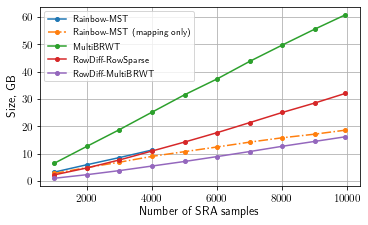

In [13]:
width = 3.487 * 1.5
height = width / 1.618

fig, axes = plt.subplots(1, 1, figsize=(width, height))
#ax.set_title('RefSeq assembly graph')

# results.sort_values('num_kmers', inplace=True)

# colors = ['c', 'b', 'g', 'r']

ax = axes

# lines = ax.plot(results.n_samples, results.rb_brwt / 10**9,
#                 marker='o', ms=4, label='Rainbow-BRWT', linestyle='-.')

f = ~(results.assignment_vector + results.mst).isna()
lines = ax.plot(results.n_samples[f], (results.assignment_vector + results.mst)[f] / 10**9,
                marker='o', ms=4, label='Rainbow-MST')

lines = ax.plot(results.n_samples, results.assignment_vector / 10**9,
                marker='o', ms=4, label='Rainbow-MST (mapping only)', linestyle='-.')

lines = ax.plot(results.n_samples, results.multi_brwt / 10**9,
                marker='o', ms=4, label='MultiBRWT')

# ax.plot(results.n_samples, results.column_compressed / 10**9,
#         marker='o', ms=4, label='ColumnCompressed', linestyle=':')

# ax.plot(results.n_samples, results.rd_optimized_100 / 10**9,
#         marker='o', ms=4, label='RowDiff(100)-ColumnCompressed', linestyle=':')

ax.plot(results.n_samples, results.rd_optimized_100_row_sparse / 10**9,
        marker='o', ms=4, label='RowDiff-RowSparse')

# ax.plot(results.n_samples, results.rd_optimized_100_multi_brwt / 10**9,
#         marker='o', ms=4, label='RowDiff-MultiBRWT')
ax.plot(results.n_samples, results.rd_optimized_100_multi_brwt / 10**9,
        marker='o', ms=4, label='RowDiff-MultiBRWT')

#ax.set_title('10k RNA-Seq samples, k=31, unitig level cleaning')
ax.set_xlabel('Number of SRA samples')
ax.set_ylabel('Size, GB')
#     ax.set_xlim([-1e9, 25e9])
#ax.set_xticks(np.array(k_array))
ax.grid(True)
#     ax.legend(loc='best')
#ax.set_xlim([900, 4100])
#ax.set_ylim([0, 14])

legend = ax.legend(loc="best", fontsize=9)
#legend.get_frame().set_facecolor('none')
# plt.ylim([-5, 110])
# axes[1].set_ylim([-1e-1, 75])
#plt.xscale('symlog')
#plt.yscale('symlog')

plt.tight_layout()
plt.savefig('rnaseq_31_size.pdf', format='pdf', bbox_inches='tight')
plt.show()

## RefSeq Fungi (k=31)

In [14]:
!ls -lh /cluster/work/grlab/projects/metagenome/data/row_diff/subsets/refseq/mantis/mantis_cqfs/ser_1_shuf/ser_1_shuf

total 435G
-rw-rw---- 1 hmustafa INFK-Raetsch-All 923K Nov  5 11:38 0_eqclass_rrr.cls
-rw-rw---- 1 hmustafa INFK-Raetsch-All 9.4K Nov  5 14:47 boundaries.bv
-rwx------ 1 hmustafa INFK-Raetsch-All 435G Nov  5 12:34 dbg_cqf.ser
-rw-rw---- 1 hmustafa INFK-Raetsch-All 103K Nov  5 14:47 deltas.bv
-rw-rw---- 1 hmustafa INFK-Raetsch-All  413 Nov  5 11:38 meta_info.json
-rw-rw---- 1 hmustafa INFK-Raetsch-All  55K Nov  5 14:47 parents.bv
-rw-rw---- 1 hmustafa INFK-Raetsch-All  31K Nov  5 12:34 sampleid.lst


In [15]:
DIR = '/cluster/home/mikhaika/metagenome/data/row_diff/subsets/refseq/nobackup/mtg/'

n_samples = []
columns = []
rd_optimized_100 = []
rd_optimized_100_multi_brwt = []
rd_optimized_100_row_sparse = []
multi_brwt = []
rb_brwt = []
mst = []

for i in range(1, 9):
    cols = !ls {DIR}cols_{i}
    num_cols = len(cols)
    n_samples.append(num_cols)

    columns.append(get_total_size(f'{DIR}cols_{i}/', '.column.annodbg'))

    rd_optimized_100.append(get_total_size(f'{DIR}rd_100_{i}/', '.row_diff.annodbg'))

    try:
        rd_optimized_100_row_sparse.append(os.path.getsize(DIR + 'row_sparse/rd_100_{}.row_diff_sparse.annodbg'.format(i)))
    except:
        rd_optimized_100_row_sparse.append(np.nan)

    try:
        rd_optimized_100_multi_brwt.append(os.path.getsize(DIR + 'multi_brwt/rd_100_{}_relaxed.row_diff_brwt.annodbg'.format(i)))
    except:
        rd_optimized_100_multi_brwt.append(np.nan)

    try:
        multi_brwt.append(os.path.getsize(DIR + 'multi_brwt/brwt_relaxed_{}.brwt.annodbg'.format(i)))
    except:
        multi_brwt.append(np.nan)

    try:
        rb_brwt.append(os.path.getsize(DIR + 'multi_brwt/rb_brwt_{}.rb_brwt.annodbg'.format(i)))
    except:
        rb_brwt.append(np.nan)

    try:
        mantis_dir = f'{DIR}../../mantis/mantis_cqfs/ser_{i}_shuf/ser_{i}_shuf/'
        mst.append(os.path.getsize(mantis_dir + 'parents.bv'.format(i))
                    + os.path.getsize(mantis_dir + 'boundaries.bv'.format(i))
                    + os.path.getsize(mantis_dir + 'deltas.bv'.format(i)))
    except:
        mst.append(np.nan)

In [16]:
rd_optimized_100_anchors = []

for i in range(1, 9):
    try:
        rd_optimized_100_anchors.append(os.path.getsize(DIR + f'rd_100_{i}/graph.dbg.anchors'))
    except:
        rd_optimized_100_anchors.append(np.nan)

In [17]:
rainbow_assignment_vector_size = [
    559366427,
    1753863675,
    2781310035,
    4629853907,
    6282245131,
    8013484075,
    9613881579,
    11409517403
]

In [18]:
results = pd.DataFrame(columns=['n_samples', 'column_compressed', 'rb_brwt', 'multi_brwt',
                                #'rd_optimized_10', 'rd_optimized_20', 'rd_optimized_40',
                                'rd_optimized_100',
                                'rd_optimized_100_anchors',
                                'rd_optimized_100_row_sparse',
                                'rd_optimized_100_multi_brwt',
                                'assignment_vector',
                                'mst'],
                       data=zip(n_samples, columns, rb_brwt, multi_brwt,
                                #rd_optimized_10, rd_optimized_20, rd_optimized_40,
                                rd_optimized_100,
                                rd_optimized_100_anchors,
                                rd_optimized_100_row_sparse,
                                rd_optimized_100_multi_brwt,
                                rainbow_assignment_vector_size,
                                mst))
results

,n_samples,column_compressed,rb_brwt,multi_brwt,rd_optimized_100,rd_optimized_100_anchors,rd_optimized_100_row_sparse,rd_optimized_100_multi_brwt,assignment_vector,mst
0,1570,664546316,NaN,692783803,14354667,8494465,61032175,25168698,559366427,169874
1,3140,1834091316,NaN,2186505952,38411634,20504051,152798391,68006986,1753863675,562346
2,4710,2998556522,NaN,3502463678,62795955,30292050,234710338,108632899,2781310035,1042594
3,6280,4630617883,NaN,5966886537,102598844,44480985,380721810,174980905,4629853907,1957194
4,7850,6628899267,NaN,7873790585,147662061,60497012,527489172,246932786,6282245131,2927506
5,9420,8224861598,NaN,10248422679,187425543,72900132,666682297,312742338,8013484075,4164074
6,10990,9640526736,NaN,12320762717,224724881,85311097,790031320,371743827,9613881579,5416650
7,12561,11214466210,NaN,14879122080,265330340,95992192,928463816,430031423,11409517403,6989842


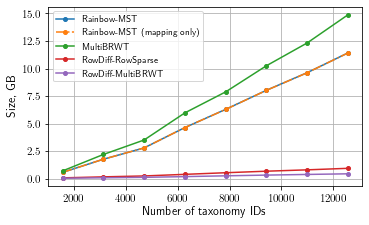

In [19]:
width = 3.487 * 1.5
height = width / 1.618

fig, axes = plt.subplots(1, 1, figsize=(width, height))
#ax.set_title('RefSeq assembly graph')

# results.sort_values('num_kmers', inplace=True)

# colors = ['c', 'b', 'g', 'r']

ax = axes

# lines = ax.plot(results.n_samples, results.rb_brwt / 10**9,
#                 marker='o', ms=4, label='Rainbow-BRWT', linestyle='-.')

f = ~(results.assignment_vector + results.mst).isna()
lines = ax.plot(results.n_samples[f], (results.assignment_vector + results.mst)[f] / 10**9,
                marker='o', ms=4, label='Rainbow-MST')

lines = ax.plot(results.n_samples, results.assignment_vector / 10**9,
                marker='o', ms=4, label='Rainbow-MST (mapping only)', linestyle='-.')

lines = ax.plot(results.n_samples, results.multi_brwt / 10**9,
                marker='o', ms=4, label='MultiBRWT')

# ax.plot(results.n_samples, results.column_compressed / 10**9,
#         marker='o', ms=4, label='ColumnCompressed', linestyle=':')

# ax.plot(results.n_samples, results.rd_optimized_100 / 10**9,
#         marker='o', ms=4, label='RowDiff(100)-ColumnCompressed', linestyle=':')

ax.plot(results.n_samples, results.rd_optimized_100_row_sparse / 10**9,
        marker='o', ms=4, label='RowDiff-RowSparse')

ax.plot(results.n_samples, results.rd_optimized_100_multi_brwt / 10**9,
        marker='o', ms=4, label='RowDiff-MultiBRWT')

# ax.plot(results.n_samples,
#         (results.graph + results.anno_column) / 10**9,
#         marker='o', ms=4, label='RowDiff (Graph + Column)', color=lines[0].get_color())

#ax.set_title('RefSeq Fungi, k=31')
ax.set_xlabel('Number of taxonomy IDs')
ax.set_ylabel('Size, GB')
#     ax.set_xlim([-1e9, 25e9])
#ax.set_xticks(np.array(k_array))
ax.grid(True)
#     ax.legend(loc='best')

legend = ax.legend(loc="best", fontsize=9)
#legend.get_frame().set_facecolor('none')
# plt.ylim([-5, 110])
# axes[1].set_ylim([-1e-1, 75])
#plt.xscale('symlog')
#plt.yscale('symlog')

plt.tight_layout()
plt.savefig('refseq_fungi_31_size.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [20]:
df = results.copy()
del df['rb_brwt']
df['Mantis-MST'] = df['assignment_vector'] + df['mst']
df['rd_optimized_100_anchors'] += df['rd_optimized_100']
df

,n_samples,column_compressed,multi_brwt,rd_optimized_100,rd_optimized_100_anchors,rd_optimized_100_row_sparse,rd_optimized_100_multi_brwt,assignment_vector,mst,Mantis-MST
0,1570,664546316,692783803,14354667,22849132,61032175,25168698,559366427,169874,559536301
1,3140,1834091316,2186505952,38411634,58915685,152798391,68006986,1753863675,562346,1754426021
2,4710,2998556522,3502463678,62795955,93088005,234710338,108632899,2781310035,1042594,2782352629
3,6280,4630617883,5966886537,102598844,147079829,380721810,174980905,4629853907,1957194,4631811101
4,7850,6628899267,7873790585,147662061,208159073,527489172,246932786,6282245131,2927506,6285172637
5,9420,8224861598,10248422679,187425543,260325675,666682297,312742338,8013484075,4164074,8017648149
6,10990,9640526736,12320762717,224724881,310035978,790031320,371743827,9613881579,5416650,9619298229
7,12561,11214466210,14879122080,265330340,361322532,928463816,430031423,11409517403,6989842,11416507245


In [21]:
df.iloc[:, 1:] /= 1e6
print(df.to_latex(float_format="%.1f", index=False))

\begin{tabular}{rrrrrrrrrr}
\toprule
 n\_samples &  column\_compressed &  multi\_brwt &  rd\_optimized\_100 &  rd\_optimized\_100\_anchors &  rd\_optimized\_100\_row\_sparse &  rd\_optimized\_100\_multi\_brwt &  assignment\_vector &  mst &  Mantis-MST \\
\midrule
      1570 &              664.5 &       692.8 &              14.4 &                      22.8 &                         61.0 &                         25.2 &              559.4 &  0.2 &       559.5 \\
      3140 &             1834.1 &      2186.5 &              38.4 &                      58.9 &                        152.8 &                         68.0 &             1753.9 &  0.6 &      1754.4 \\
      4710 &             2998.6 &      3502.5 &              62.8 &                      93.1 &                        234.7 &                        108.6 &             2781.3 &  1.0 &      2782.4 \\
      6280 &             4630.6 &      5966.9 &             102.6 &                     147.1 &                        380.7 &       

In [22]:
(results.assignment_vector + results.mst).iloc[-1] / results.rd_optimized_100_multi_brwt.iloc[-1]

26.54807680182013

## Construction time

In [90]:
import re

def parse_wall_time_from_logs(log_file):
    try:
        lines = !grep "time (h:mm:ss or m:ss):" $log_file
        lines_exit = !grep "Exit status:" $log_file
        assert(len(lines) == len(lines_exit))

        query_time = 0
        for line, line_exit in zip(lines, lines_exit):
            if int(re.search('Exit status: ([0-9]*)', line_exit).group(1)) != 0:
                continue

            time_str = re.search('time \(h:mm:ss or m:ss\): ([0-9:\.]*)', line).group(1)
            for i, x in enumerate(time_str.split(':')[::-1]):
                query_time += float(x) * 60**i

        return query_time

    except:
         return np.nan

### RNA-Seq (k=23)

In [91]:
DIR = '/cluster/home/mikhaika/metagenome/data/mantis/subsets/mtg'

n_samples = []

rd_optimized_10 = []
rd_optimized_10_opt = []
rd_optimized_100 = []
rd_optimized_100_opt = []
rd_optimized_100_multi_brwt = []
rd_optimized_100_multi_brwt_relax = []

for i in range(1, 11):
    num_cols = !cat {DIR}/../{i}k.txt | wc -l
    n_samples.append(int(num_cols[0]))

#     rd_optimized_10.append(parse_wall_time_from_logs(f'{DIR}logs/graph_primary_subset_{i}k_rd_10.log'))
#     rd_optimized_10_opt.append(parse_wall_time_from_logs(f'{DIR}logs/graph_primary_subset_{i}k_rd_10_opt.log'))
    name = f'{DIR}/logs/rd_100d_{i}k_{72}t'
    rd_optimized_100.append(parse_wall_time_from_logs(f'{name}.log'))
    rd_optimized_100_opt.append(parse_wall_time_from_logs(f'{name}_opt.log'))
    rd_optimized_100_multi_brwt.append(parse_wall_time_from_logs(f'{name}_multi_brwt.log'))
    rd_optimized_100_multi_brwt_relax.append(parse_wall_time_from_logs(f'{name}_multi_brwt_relax.log'))

In [92]:
results = pd.DataFrame(columns=['n_samples',
                                'rd_optimized_100', 'rd_optimized_100_opt',
                                'rd_optimized_100_multi_brwt', 'rd_optimized_100_multi_brwt_relax'],
                       data=zip(n_samples,
                                rd_optimized_100, rd_optimized_100_opt,
                                rd_optimized_100_multi_brwt, rd_optimized_100_multi_brwt_relax))
results

,n_samples,rd_optimized_100,rd_optimized_100_opt,rd_optimized_100_multi_brwt,rd_optimized_100_multi_brwt_relax
0,1000,1252.86,280.18,177.11,148.16
1,2000,2085.63,547.03,331.94,304.64
2,3000,2996.94,730.49,471.33,484.69
3,4000,4239.00,1176.69,659.86,684.11
4,5000,4739.00,1411.18,844.31,892.80
5,6000,6001.00,1730.32,1036.18,1012.31
6,7000,6298.00,2000.42,1190.99,1247.11
7,8000,7108.00,1946.85,1310.07,1412.95
8,9000,8082.00,2469.17,1522.71,1685.61
9,9998,8995.00,2767.59,1773.54,1901.52


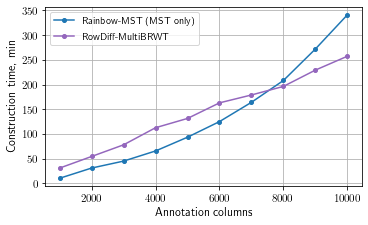

In [93]:
width = 3.487 * 1.5
height = width / 1.618

fig, axes = plt.subplots(1, 1, figsize=(width, height))
#ax.set_title('RefSeq assembly graph')

# results.sort_values('num_kmers', inplace=True)

# colors = ['c', 'b', 'g', 'r']

ax = axes

# lines = ax.plot(results.n_samples, results.rb_brwt / 10**9,
#                 marker='o', ms=4, label='Rainbow-BRWT')

# ax.plot(results.n_samples, results.column_compressed / 10**9,
#         marker='o', ms=4, label='ColumnCompressed')

# ax.plot(results.n_samples, (results.rd_optimized_10) / 60,
#         marker='o', ms=4, label='RowDiff(10)-ColumnCompressed, unopt')

mantis_nsamples = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]

# 16 threads
# mantis_time = [(18*60)+53.60,
#                 (55*60)+33.28,
#                 (((1*60)+20)*60)+34,
#                 (((2*60)+2)*60)+23,
#                 (((2*60)+47)*60)+52,
#                 (((3*60)+37)*60)+52,
#                 (((4*60)+31)*60)+12,
#                 (((6*60)+24)*60)+33,
#                 (((6*60)+43)*60)+0,
#                 (((7*60)+54)*60)+47]

# 72 threads
mantis_time = [(0*60+10)*60+21.96,
                (0*60+31)*60+2.53,
                (0*60+45)*60+6.39,
                (1*60+5)*60+37,
                (1*60+33)*60+29,
                (2*60+5)*60+4,
                (2*60+44)*60+6,
                (3*60+28)*60+18,
                (4*60+32)*60+0,
                (5*60+41)*60+10]

paper_mantis_nsamples = [200, 500, 1000, 2000, 5000, 10000]
paper_mantis_time = [342,
              12 * 60 + 15,
              25 * 50 + 3,
              51 * 60 + 58,
              (3*60 + 52) * 60 + 34,
              (10*60 + 17) * 60 + 42]

# lines = ax.plot(paper_mantis_nsamples, np.array(paper_mantis_time) / 60,
#         marker='o', ms=4, label='Rainbow-MST (MST only) reported', linestyle=':')

ax.plot(mantis_nsamples, np.array(mantis_time) / 60,
        marker='o', ms=4, label='Rainbow-MST (MST only)')

# ax.plot(results.n_samples, (results.rd_optimized_10 + results.rd_optimized_10_opt) / 60,
#         marker='o', ms=4, label='RowDiff(10)-ColumnCompressed')

# ax.plot(results.n_samples, (results.rd_optimized_100) / 60,
#         marker='o', ms=4, label='RowDiff(100)-ColumnCompressed, unopt')

ax.plot([], [])
ax.plot([], [])
ax.plot([], [])

ax.plot(results.n_samples, (results.rd_optimized_100
                            + results.rd_optimized_100_opt
                            + results.rd_optimized_100_multi_brwt
                            + results.rd_optimized_100_multi_brwt_relax) / 60,
        marker='o', ms=4, label='RowDiff-MultiBRWT')


# ax.plot(results.n_samples,
#         (results.graph + results.anno_column) / 10**9,
#         marker='o', ms=4, label='RowDiff (Graph + Column)', color=lines[0].get_color())

#ax.set_title('10k RNA-Seq samples: construction on 15 cores')
ax.set_xlabel('Annotation columns')
ax.set_ylabel('Construction time, min')
#     ax.set_xlim([-1e9, 25e9])
#ax.set_xticks(np.array(k_array))
ax.grid(True)
#     ax.legend(loc='best')

legend = ax.legend(loc="best", fontsize=10)
#legend.get_frame().set_facecolor('none')
# plt.ylim([-5, 110])
# axes[1].set_ylim([-1e-1, 75])
#plt.xscale('symlog')
#plt.yscale('symlog')

plt.tight_layout()
plt.savefig('rnaseq_23_construction.pdf', format='pdf', bbox_inches='tight')
plt.show()

### RNA-Seq (k=31, unitig cleaning)

In [688]:
DIR = '/cluster/home/mikhaika/metagenome/data/mantis/subsets/clean_rnaseq/mtg/'

n_samples = []

rd_optimized_10 = []
rd_optimized_10_opt = []
rd_optimized_100 = []
rd_optimized_100_opt = []
rd_optimized_100_multi_brwt = []
rd_optimized_100_multi_brwt_relax = []

for i in range(1, 11):
    num_cols = !cat {DIR}../clean_{i}k.txt | wc -l
    n_samples.append(int(num_cols[0]))

#     rd_optimized_10.append(parse_wall_time_from_logs(f'{DIR}logs/graph_primary_subset_{i}k_rd_10.log'))
#     rd_optimized_10_opt.append(parse_wall_time_from_logs(f'{DIR}logs/graph_primary_subset_{i}k_rd_10_opt.log'))
    rd_optimized_100.append(parse_wall_time_from_logs(f'{DIR}logs/clean_primary_subset_{i}k_rd_100.log'))
    rd_optimized_100_opt.append(parse_wall_time_from_logs(f'{DIR}logs/clean_primary_subset_{i}k_rd_100_opt.log'))
    rd_optimized_100_multi_brwt.append(parse_wall_time_from_logs(f'{DIR}logs/clean_primary_subset_{i}k_rd_100_multi_brwt.log'))
    rd_optimized_100_multi_brwt_relax.append(parse_wall_time_from_logs(f'{DIR}logs/clean_primary_subset_{i}k_rd_100_multi_brwt_relax.log'))

In [689]:
results = pd.DataFrame(columns=['n_samples',
                                'rd_optimized_100', 'rd_optimized_100_opt',
                                'rd_multi_brwt', 'rd_multi_brwt_relax'],
                       data=zip(n_samples,
                                rd_optimized_100, rd_optimized_100_opt,
                                rd_optimized_100_multi_brwt,
                                rd_optimized_100_multi_brwt_relax))
results

,n_samples,rd_optimized_100,rd_optimized_100_opt,rd_multi_brwt,rd_multi_brwt_relax
0,1000,640.32,326.20,83.61,85.77
1,2000,1332.22,621.66,177.41,194.47
2,3000,1639.30,811.28,281.14,319.64
3,4000,2334.66,1029.08,414.19,464.51
4,5000,2904.19,1280.12,550.45,586.43
5,6000,3394.73,1590.16,682.78,723.60
6,7000,3703.00,1820.60,798.27,870.75
7,8000,4217.00,2114.40,1088.18,1017.22
8,9000,4866.00,2475.00,1247.44,1149.31
9,9937,5136.00,2760.29,1311.76,1293.35


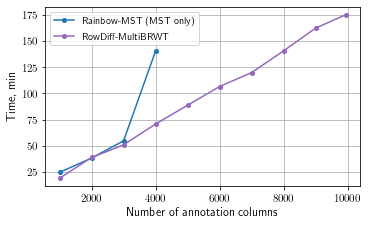

In [691]:
width = 3.487 * 1.5
height = width / 1.618

fig, axes = plt.subplots(1, 1, figsize=(width, height))
#ax.set_title('RefSeq assembly graph')

# results.sort_values('num_kmers', inplace=True)

# colors = ['c', 'b', 'g', 'r']

ax = axes

# lines = ax.plot(results.n_samples, results.rb_brwt / 10**9,
#                 marker='o', ms=4, label='Rainbow-BRWT')

# ax.plot(results.n_samples, results.column_compressed / 10**9,
#         marker='o', ms=4, label='ColumnCompressed')

# ax.plot(results.n_samples, (results.rd_optimized_10) / 60,
#         marker='o', ms=4, label='RowDiff(10)-ColumnCompressed, unopt')

mantis_nsamples = [1000, 2000, 3000, 4000]
mantis_time = [24*60 + 35.96,
              38*60 + 11.94,
              54*60 + 41.24,
              2*60*60 + 20 * 60 + 29]

ax.plot(mantis_nsamples, np.array(mantis_time) / 60,
        marker='o', ms=4, label='Rainbow-MST (MST only)')

# ax.plot(results.n_samples, (results.rd_optimized_10 + results.rd_optimized_10_opt) / 60,
#         marker='o', ms=4, label='RowDiff(10)-ColumnCompressed')

# ax.plot(results.n_samples, (results.rd_optimized_100) / 60,
#         marker='o', ms=4, label='RowDiff(100)-ColumnCompressed, unopt')


ax.plot([], [])
ax.plot([], [])
ax.plot([], [])

ax.plot(results.n_samples, (results.rd_optimized_100
                            + results.rd_optimized_100_opt
                            + results.rd_multi_brwt
                            + results.rd_multi_brwt_relax) / 60,
        marker='o', ms=4, label='RowDiff-MultiBRWT')


# ax.plot(results.n_samples,
#         (results.graph + results.anno_column) / 10**9,
#         marker='o', ms=4, label='RowDiff (Graph + Column)', color=lines[0].get_color())

#ax.set_title('10k RNA-Seq: construction on 15 cores')
ax.set_xlabel('Number of annotation columns')
ax.set_ylabel('Time, min')
#     ax.set_xlim([-1e9, 25e9])
#ax.set_xticks(np.array(k_array))
ax.grid(True)
#     ax.legend(loc='best')

legend = ax.legend(loc="best", fontsize=10)
#legend.get_frame().set_facecolor('none')
# plt.ylim([-5, 110])
# axes[1].set_ylim([-1e-1, 75])
#plt.xscale('symlog')
#plt.yscale('symlog')

plt.tight_layout()
plt.savefig('rnaseq_31_construction.pdf', format='pdf', bbox_inches='tight')
plt.show()

## Query time

In [151]:
!ls ~/metagenome/data/row_diff/query/*.log | sort

/cluster/home/mikhaika/metagenome/data/row_diff/query/brwt_relaxed_10k.brwt.annodbg_transcripts_1000.fa.log
/cluster/home/mikhaika/metagenome/data/row_diff/query/brwt_relaxed_10k.brwt.annodbg_transcripts_100.fa.log
/cluster/home/mikhaika/metagenome/data/row_diff/query/rd_100d_10k_72t_relaxed.row_diff_brwt.annodbg_transcripts_1000.fa.log
/cluster/home/mikhaika/metagenome/data/row_diff/query/rd_100d_10k_72t_relaxed.row_diff_brwt.annodbg_transcripts_100.fa.log
/cluster/home/mikhaika/metagenome/data/row_diff/query/rd_100d_10k_72t.row_diff_sparse.annodbg_transcripts_1000.fa.log
/cluster/home/mikhaika/metagenome/data/row_diff/query/rd_100d_10k_72t.row_diff_sparse.annodbg_transcripts_100.fa.log
/cluster/home/mikhaika/metagenome/data/row_diff/query/rd_10d_10k_72t_relaxed.row_diff_brwt.annodbg_transcripts_1000.fa.log
/cluster/home/mikhaika/metagenome/data/row_diff/query/rd_10d_10k_72t_relaxed.row_diff_brwt.annodbg_transcripts_100.fa.log
/cluster/home/mikhaika/metagenome/data/row_diff/query/rd_1

In [242]:
DIR = '/cluster/home/mikhaika/metagenome/data/row_diff/query'

def get_traversal_time(log_file):
    line = !grep 'Traversed row-diff paths and reached anchors' {log_file}
    assert(len(line) == 1)
    return float(str(line).split(' ')[-2])

def get_query_time(log_file):
    line = !grep 'Query annotation with' {log_file}
    assert(len(line) == 1)
    return float(str(line).split(' ')[-2])

query = 'transcripts_100.fa'

ds = [0, 10, 25, 50, 75, 100]
rd_rowsparse = [np.nan]
rd_rowsparse_traversal = [0]
rd_multibrwt = [get_query_time(DIR + f'/brwt_relaxed_10k.brwt.annodbg_{query}.log')]
rd_multibrwt_traversal = [0]

for d in ds[1:]:
    rd_rowsparse.append(get_query_time(DIR + f'/rd_{d}d_10k_72t.row_diff_sparse.annodbg_{query}.log'))
    rd_multibrwt.append(get_query_time(DIR + f'/rd_{d}d_10k_72t_relaxed.row_diff_brwt.annodbg_{query}.log'))
    rd_rowsparse_traversal.append(get_traversal_time(DIR + f'/rd_{d}d_10k_72t.row_diff_sparse.annodbg_{query}.log'))
    rd_multibrwt_traversal.append(get_traversal_time(DIR + f'/rd_{d}d_10k_72t_relaxed.row_diff_brwt.annodbg_{query}.log'))
    
rd_rowsparse

[nan, 8.28067594, 9.206415458, 8.401502338, 9.867869846, 8.34369484]

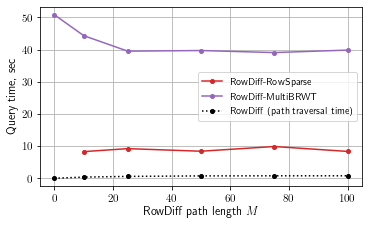

In [243]:
width = 3.487 * 1.5
height = width / 1.618

fig, axes = plt.subplots(1, 1, figsize=(width, height))
ax = axes

ax.plot(ds, rd_rowsparse, marker='o', ms=4, c='#d62728', label='RowDiff-RowSparse')
ax.plot(ds, rd_multibrwt, marker='o', ms=4, c='#9467bd', label='RowDiff-MultiBRWT')
ax.plot(ds, rd_multibrwt_traversal, marker='o', ms=4, c='black', linestyle=':', label='RowDiff (path traversal time)')
#ax.plot(ds, rd_multibrwt_traversal, marker='o', c='#9467bd', ms=4, label='RowDiff-MultiBRWT-traversal')
ax.set_xlabel('RowDiff path length $M$')
ax.set_ylabel('Query time, sec')
ax.grid(True)
legend = ax.legend(loc="best", fontsize=10)
plt.tight_layout()
plt.savefig('query_time_vs_path_length_100.pdf', format='pdf', bbox_inches='tight')
plt.show()

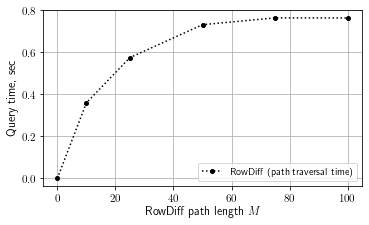

In [244]:
fig, axes = plt.subplots(1, 1, figsize=(width, height))
ax = axes

#ax.plot(ds, rd_rowsparse, marker='o', ms=4, c='#d62728', label='RowDiff-RowSparse')
#ax.plot(ds, rd_multibrwt, marker='o', ms=4, c='#9467bd', label='RowDiff-MultiBRWT')
ax.plot(ds, rd_multibrwt_traversal, marker='o', ms=4, c='black', linestyle=':', label='RowDiff (path traversal time)')
#ax.plot(ds, rd_multibrwt_traversal, marker='o', c='#9467bd', ms=4, label='RowDiff-MultiBRWT-traversal')
ax.set_xlabel('RowDiff path length $M$')
ax.set_ylabel('Query time, sec')
ax.grid(True)
legend = ax.legend(loc="best", fontsize=10)
plt.tight_layout()
plt.savefig('query_time_vs_path_length_100_traversal.pdf', format='pdf', bbox_inches='tight')
plt.show()

## Column reduction

In [34]:
def get_reductions(rd_path, cols_path):
    for entry in os.scandir(os.path.abspath(cols_path)):
        extension = '.column.annodbg'
        if entry.path.endswith(extension):
            size = entry.stat(follow_symlinks=False).st_size
            col = entry.path.split('/')[-1][:-len(extension)]
            rd_size = os.path.getsize(f'{rd_path}/{col}.row_diff.annodbg')
        yield rd_size, size

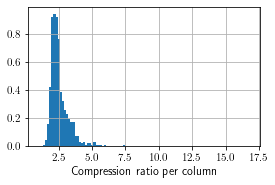

In [72]:
width = 3.487 * 1.19
height = width / 1.618

fig, axes = plt.subplots(1, 1, figsize=(width, height))

R = np.array(list(get_reductions('/cluster/home/mikhaika/metagenome/data/row_diff/subsets/clean_rnaseq/nobackup/mtg/rd_100_10k',
                                 '/cluster/home/mikhaika/metagenome/data/row_diff/subsets/clean_rnaseq/nobackup/mtg/cols_10k')))
#plt.hist((R[:, 1] - R[:, 0]) / R[:, 1], bins=100, density=True, fc=(0, 0, 1, 0.5), label='RowDiff(100)')
plt.hist(R[:, 1] / R[:, 0], bins=100, density=True, weights=R[:, 1], label='RowDiff(100), weighted by Full') #, fc=(1, 0, 0, 0.5)

#plt.title('10k RNA-Seq samples: column reduction factor')
plt.xlabel('Compression ratio per column')
#plt.legend()
plt.grid()
plt.savefig('rnaseq_31_compression_hist.pdf', format='pdf', bbox_inches='tight')
plt.show()

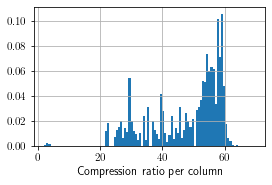

In [70]:
width = 3.487 * 1.19
height = width / 1.618

fig, axes = plt.subplots(1, 1, figsize=(width, height))

R = np.array(list(get_reductions('/cluster/home/mikhaika/metagenome/data/row_diff/subsets/refseq/nobackup/mtg/rd_100_8',
                                 '/cluster/home/mikhaika/metagenome/data/row_diff/subsets/refseq/nobackup/mtg/cols_8')))
#plt.hist((R[:, 1] - R[:, 0]) / R[:, 1], bins=100, density=True, fc=(0, 0, 1, 0.5), label='RowDiff(100)')
plt.hist(R[:, 1] / R[:, 0], bins=100, density=True, weights=R[:, 1], label='RowDiff(100), weighted by Full') #, fc=(1, 0, 0, 0.5)

#plt.title('RefSeq Fungi: column reduction factor')
plt.xlabel('Compression ratio per column')
#plt.legend()
plt.grid()
plt.savefig('refseq_fungi_31_compression_hist.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [ ]:
((R[:, 1] - R[:, 0]) / R[:, 1]).mean()

In [41]:
print(R[:, 1].sum() / 1e9, R[:, 0].sum() / 1e9)

11.21446621 0.26533034


In [38]:
R[:, 1].sum() / R[:, 0].sum()

42.26605298888925

## Other tests

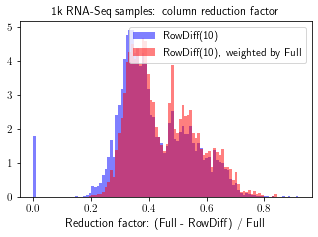

In [892]:
width = 3.487 * 1.5 * 1
height = width / 1.618

fig, axes = plt.subplots(1, 1, figsize=(width, height))

reductions_10 = list(get_reductions('/cluster/home/mikhaika/metagenome/data/mantis/subsets/mtg/rd_100_10k',
                                    '/cluster/home/mikhaika/metagenome/data/mantis/subsets/mtg/cols_10k'))
R = np.array(reductions_10)
plt.hist((R[:, 1] - R[:, 0]) / R[:, 1], bins=100, density=True, fc=(0, 0, 1, 0.5), label='RowDiff(10)')
plt.hist((R[:, 1] - R[:, 0]) / R[:, 1], bins=100, density=True, fc=(1, 0, 0, 0.5), weights=R[:, 1], label='RowDiff(10), weighted by Full')

plt.title('1k RNA-Seq samples: column reduction factor')
plt.xlabel('Reduction factor: (Full - RowDiff) / Full')
plt.legend()

plt.show()

### Before anchor optimization

In [87]:
def get_reductions_path(rd_path, cols_path):
    for entry in os.scandir(rd_path):
        extension = '.row_diff.annodbg'
        if entry.path.endswith(extension):
            rd_size = entry.stat(follow_symlinks=False).st_size
            col = entry.path.split('/')[-1][:-len(extension)]
            size = os.path.getsize(f'{cols_path}/{col}.column.annodbg')
            yield rd_size, size, entry.path

In [88]:
df = pd.DataFrame(data=get_reductions_path('/cluster/home/mikhaika/metagenome/data/mantis/subsets/mtg/test_rd_100_10k',
                                           '/cluster/home/mikhaika/metagenome/data/mantis/subsets/mtg/cols_10k'),
                  columns=['reduced', 'original', 'file'])

In [89]:
d = df.iloc[((df['original'] - df['reduced']) / df['original']).argsort().values]

In [90]:
ds = d[d.original > 33]

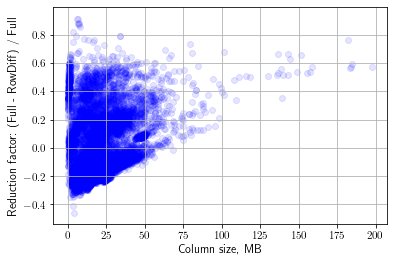

In [91]:
plt.scatter(ds.original / 10**6, ((ds['original'] - ds['reduced']) / ds['original']).values, fc=(0, 0, 1, 0.1))
plt.xlabel('Column size, MB')
plt.ylabel('Reduction factor: (Full - RowDiff) / Full')
plt.grid()
plt.show()

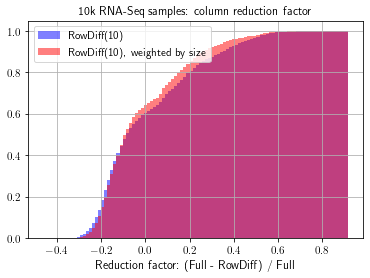

In [92]:
plt.hist(((ds['original'] - ds['reduced']) / ds['original']).values, bins=100, cumulative=True, density=True, fc=(0, 0, 1, 0.5), label='RowDiff(10)')
plt.hist(((ds['original'] - ds['reduced']) / ds['original']).values, bins=100, cumulative=True, density=True, fc=(1, 0, 0, 0.5), weights=ds['reduced'], label='RowDiff(10), weighted by size')

plt.title('10k RNA-Seq samples: column reduction factor')
plt.xlabel('Reduction factor: (Full - RowDiff) / Full')
#plt.yticks([])
plt.grid()
plt.legend()

plt.show()

In [93]:
d[((d['original'] - d['reduced']) / d['original'] <= -0.2)].original.sum() / 10**9

17.467293218

In [248]:
ds[((ds['original'] - ds['reduced']) / ds['original'] > -0.2)].to_csv('/cluster/home/mikhaika/metagenome/data/mantis/subsets/mtg/test_rd_100_10k_trunc_0.2/columns.txt', columns=['file'], index=False, header=False)

### After anchor optimization

In [98]:
df = pd.DataFrame(data=get_reductions_path('/cluster/home/mikhaika/metagenome/data/mantis/subsets/mtg/rd_100_10k',
                                           '/cluster/home/mikhaika/metagenome/data/mantis/subsets/mtg/cols_10k'),
                  columns=['reduced', 'original', 'file'])

In [99]:
d = df.iloc[((df['original'] - df['reduced']) / df['original']).argsort().values]

In [100]:
d[((d['original'] - d['reduced']) / d['original'] <= -0.2)].original.sum() / 10**9

5.478e-06

In [101]:
d['reduced'].sum() / 10**9

117.827011506

In [102]:
ds = d[d.original > 33]

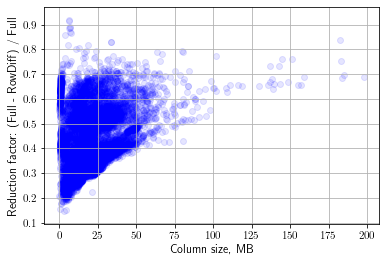

In [103]:
plt.scatter(ds.original / 10**6, ((ds['original'] - ds['reduced']) / ds['original']).values, fc=(0, 0, 1, 0.1))
plt.xlabel('Column size, MB')
plt.ylabel('Reduction factor: (Full - RowDiff) / Full')
plt.grid()
plt.show()

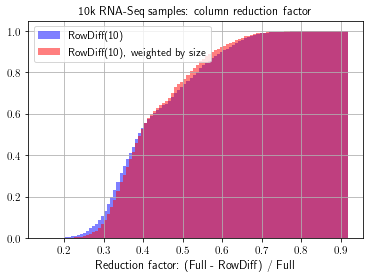

In [104]:
plt.hist(((ds['original'] - ds['reduced']) / ds['original']).values, bins=100, cumulative=True, density=True, fc=(0, 0, 1, 0.5), label='RowDiff(10)')
plt.hist(((ds['original'] - ds['reduced']) / ds['original']).values, bins=100, cumulative=True, density=True, fc=(1, 0, 0, 0.5), weights=ds['reduced'], label='RowDiff(10), weighted by size')

plt.title('10k RNA-Seq samples: column reduction factor')
plt.xlabel('Reduction factor: (Full - RowDiff) / Full')
#plt.yticks([])
plt.grid()
plt.legend()

plt.show()